In [12]:
# Importing libraries
import os
import sys
sys.path.append('..')
from py_helpers.general_helpers import *
from py_helpers.fc_functions import *
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import regex as re
import scipy.io as sio
import mat73

In [15]:
# Get paths, depending on whether we're in HPC or not
hpc = False
(_, _, _, _, _, _, 
    FMRI_MAIN_FOLDER, _, _, _, _, _) = get_main_paths(hpc)
check_input_folders(FMRI_MAIN_FOLDER, "fMRI")
    
# --------------- Get fMRI from subdirectories --------------- #
FMRI_INPUT_FILES = glob_files(FMRI_MAIN_FOLDER, "mat")
check_globbed_files(FMRI_INPUT_FILES, "fMRI")

BOLD_all = []
FC_all = []
# Load the processed matrices for every subject
for subject in range(len(FMRI_INPUT_FILES)):
    # Get the BOLD data
    BOLD_matrix = mat73.loadmat(FMRI_INPUT_FILES[subject])
    BOLD_data = np.array(BOLD_matrix['Data'])
    # Process the BOLD data
    BOLD_data = process_BOLD(BOLD_data, order=6, TR=0.7, cutoffLow=0.01, cutoffHigh=0.1)
    # Append the processed BOLD data to the list
    BOLD_all.append(BOLD_data)
    # Calculate the FC matrix
    correlation = np.corrcoef(BOLD_data)
    # Append the FC matrix to the list
    FC_all.append(correlation)

--- fMRI folder found. Continuing...
fMRI files found. Continuing...


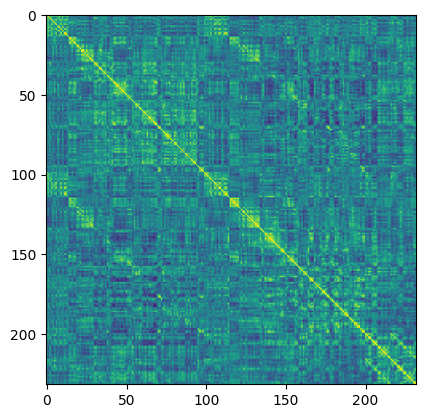

In [16]:
# Draw one of the FC matrices using matplotlib
plt.imshow(FC_all[0])
plt.show()